In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('Student_Performance.csv')

In [ ]:
#DATA EXPLORATION

In [6]:
data.shape

(10000, 6)

In [7]:
len(data)#

10000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [10]:
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [11]:
data.tail(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9990,9,43,No,7,4,40.0
9991,5,97,Yes,7,4,83.0
9992,9,52,No,9,7,50.0
9993,9,58,Yes,7,7,55.0
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [43]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [36]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})

In [37]:
#TO CHECK MAP
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [38]:
random_sample = data.sample(n=200, random_state=42)

In [39]:
random_sample

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,0,8,2,51.0
4684,2,46,1,4,8,20.0
1731,7,56,1,7,5,46.0
4742,6,42,1,8,5,28.0
4521,7,53,0,4,6,41.0
...,...,...,...,...,...,...
4516,2,94,1,9,1,72.0
1261,3,52,1,9,1,33.0
3160,4,41,0,5,0,21.0
970,8,52,0,7,1,48.0


In [40]:
# Define the target and feature variables
x1 = random_sample[['Hours Studied', 'Previous Scores', 'Extracurricular Activities']]
y = random_sample['Performance Index']

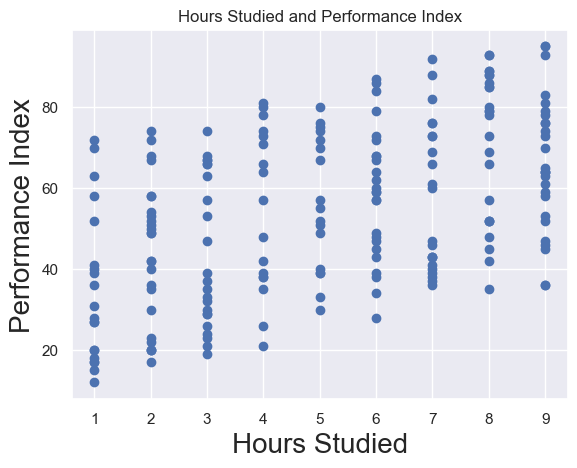

In [42]:
plt.scatter(random_sample['Hours Studied'],random_sample['Performance Index'])
plt.title('Hours Studied and Performance Index')

plt.ylabel('Performance Index', fontsize = 20)
plt.xlabel('Hours Studied',fontsize = 20)
plt.show()

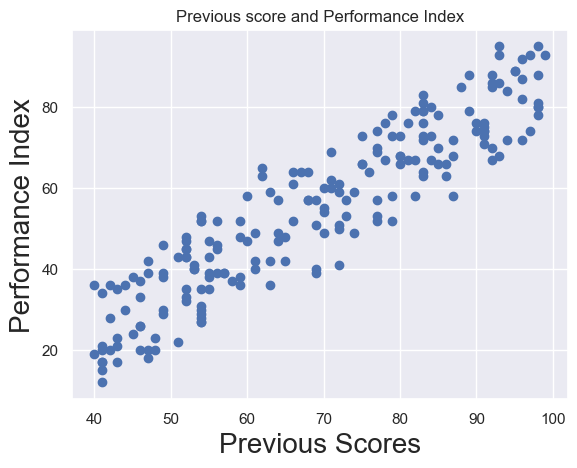

In [43]:
plt.scatter(random_sample['Previous Scores'],random_sample['Performance Index'])
plt.title('Previous score and Performance Index')

plt.xlabel('Previous Scores', fontsize = 20)
plt.ylabel('Performance Index',fontsize = 20)
plt.show()

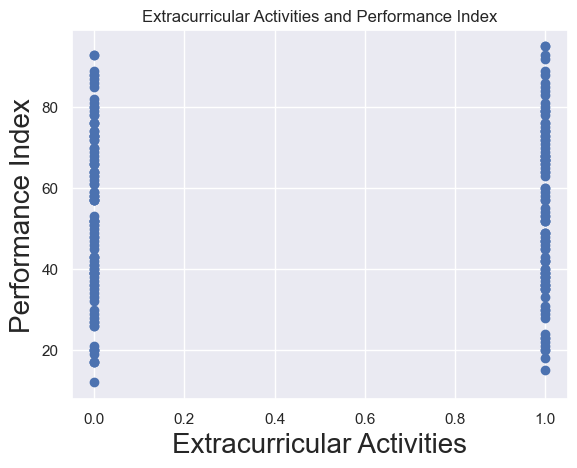

In [61]:
plt.scatter(random_sample['Extracurricular Activities'],random_sample['Performance Index'])
plt.title('Extracurricular Activities and Performance Index')
plt.xlabel('Extracurricular Activities', fontsize = 20)
plt.ylabel('Performance Index',fontsize = 20)
plt.show()

In [45]:
x1

,Hours Studied,Previous Scores,Extracurricular Activities
6252,5,69,0
4684,2,46,1
1731,7,56,1
4742,6,42,1
4521,7,53,0
...,...,...,...
4516,2,94,1
1261,3,52,1
3160,4,41,0
970,8,52,0


In [46]:
y

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
4516    72.0
1261    33.0
3160    21.0
970     48.0
3912    81.0
Name: Performance Index, Length: 200, dtype: float64

In [47]:
reg = LinearRegression()
reg.fit(x1,y)

LinearRegression()

In [48]:
reg.coef_

array([2.92152356, 1.01398723, 0.26379364])

In [49]:
reg.intercept_

-30.120905779773054

In [50]:
reg.score(x1,y)

0.986897871984462

In [51]:
# To find adjusted R2
def adj_r2(x1,y):
    r2 = reg.score(x1,y)
    n = x1.shape[0]
    p = x1.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [52]:
adj_r2(x1,y)

0.986697329208714

In [53]:
reg.predict([[5,60,1]])

C:\Users\Lenovo\anaconda37\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.58973974])

In [54]:
new_data = pd.DataFrame({'Hours Studied': [8,7,5,3], 'Previous Scores': [80,50,66,78],'Extracurricular Activities': [1,0,0,1]})


In [55]:
new_data = new_data[['Hours Studied','Previous Scores',	'Extracurricular Activities']]
new_data

,Hours Studied,Previous Scores,Extracurricular Activities
0,8,80,1
1,7,50,0
2,5,66,0
3,3,78,1


In [56]:
predictions = reg.predict(new_data)
predictions


array([74.6340551 , 41.02912086, 51.40986951, 57.99846285])

In [57]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
marks = new_data.join(predictionsdf)

In [58]:
marks

,Hours Studied,Previous Scores,Extracurricular Activities,Predictions
0,8,80,1,74.634055
1,7,50,0,41.029121
2,5,66,0,51.409870
3,3,78,1,57.998463


In [60]:
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4921.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          3.52e-184
Time:                        19:41:10   Log-Likelihood:                -455.03
No. Observations:                 200   AIC:                             918.1
Df Residuals:                     196   BIC:                             931.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -30.1209      0.733    -41.096      0.000     -31.566     -28.675
Hours Studied                  2.9215      0.064     45.473      0.000       2.795       3.048
Previous Scores                1.0140      0.010    104.378      0.000       0.995       1.033
Extracurricular Activities     0.2638      0.338      0.780      0.436      -0.403       0.930
==============================================================================
Omnibus:                        0.581   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.449
Skew:                           0.115   Prob(JB):                        0.799
Kurtosis:                       3.032   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""